# <span style="color:blue">**Capítulo 7**</span>
## <font color=blue size=8> Naive Bayes </font>
###  <font color=blue> Un algoritmo de aprendizaje supervisado para la clasificación </font>

## ¿En pocas palabras?

Cuando necesitas realizar predicciones rápidas sobre un conjunto de datos de alta dimensión, se utiliza *Naive Bayes*. Este es uno de los algoritmos más eficientes para clasificación y probablemente el más sencillo. Cuando tienes varios miles de puntos de datos y muchas características en tu conjunto, se entrena rápidamente para ofrecer predicciones en tiempo real. Así, ayuda a construir modelos de *machine learning* rápidos para predicciones inmediatas y además es fácil de implementar.

El teorema de *Naive Bayes* realiza una suposición “ingenua”: que las distintas características son condicionalmente independientes entre sí, lo cual no siempre es cierto. A pesar de esta suposición, el algoritmo supera en rendimiento a métodos de clasificación incluso muy sofisticados. Es un clasificador probabilístico, que considera que cada característica contribuye de forma independiente a la probabilidad de ocurrencia del valor objetivo, sin importar la correlación con otras características. Con esta suposición simple, predice usando la máxima verosimilitud.

El algoritmo es más adecuado para aprendizaje supervisado. Los métodos bayesianos, derivados de los principios de la inferencia bayesiana, son buenos para aprendizaje supervisado. La inferencia bayesiana es un método estadístico en el que actualizamos la probabilidad de una hipótesis a medida que obtenemos más información.

## ¿Cuándo Usarlo?

Algunas aplicaciones de este algoritmo son el filtrado de spam, el análisis de sentimientos y la clasificación de artículos académicos. Para citar un ejemplo concreto, considera un modelo que te ayude a decidir cuándo salir a jugar. Salir depende de factores como la temperatura exterior, la lluvia y la humedad. Todos estos factores contribuyen de manera independiente a la probabilidad de salir a jugar, aunque en la realidad dependen entre sí. Por ello, el algoritmo se llama “ingenuo” debido a esta suposición de simplicidad. Para entender la implementación de este algoritmo, revisemos brevemente el teorema de *naive Bayes*.

## Teorema de *Naive Bayes*

El teorema de Bayes, también conocido como regla o ley de Bayes, se utiliza para determinar la probabilidad de una hipótesis con conocimiento previo. La fórmula se muestra en la figura 7.1.

$$
P(c|x) = \frac{P(x|c) \cdot P(c)}{P(x)}
$$

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 7.1</p>

<p>Teorema de Bayes</p>

donde:  
• $P(c|x)$ es la probabilidad posterior de la clase $c$ dado el predictor $x$  
• $P(c)$ es la probabilidad previa de la clase $c$  
• $P(x|c)$ es la probabilidad (verosimilitud) de un predictor dado la clase $c$  
• $P(x)$ es la probabilidad previa del predictor $x$

La probabilidad posterior final de la clase $c$ se calcula teniendo en cuenta todas las características de la siguiente manera:  

$$
P(c|x_1,x_2,\dots,x_n) = P(x_1|c) \cdot P(x_2|c) \cdot \dots \cdot P(x_n|c) \cdot P(c)
$$  

donde $x_1, x_2, \dots, x_n$ son los predictores y hay $n$ predictores. 
Ahora ilustraré cómo se calculan estas probabilidades para un conjunto de datos real.

### Aplicando el Teorema

Para entender cómo se aplica el teorema, presentaré un estudio de caso trivial. Considere un banco que otorga préstamos a candidatos elegibles. La elegibilidad para el préstamo depende de varios factores (características). Usamos la ecuación bayesiana *naive* para calcular la probabilidad posterior para cada clase. La clase con la probabilidad posterior más alta será la predicción realizada por el modelo.

Para mantenerlo simple, le mostraré el cálculo de probabilidad sobre un solo campo: la educación del cliente. La tabla 7.1 muestra datos de ejemplo:

| Educación      | Loan_status |
|---------------|-------------|
| Graduate      | Yes         |
| Graduate      | No          |
| Not graduate  | Yes         |
| Graduate      | No          |
| Not graduate  | No          |
| Graduate      | Yes         |
| Not graduate  | No          |
| Graduate      | No          |

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 7.1</p>

<p>Estado del préstamo para el campo educación.</p>

La tabla 7.1 muestra el estado del préstamo—si fue aprobado o no y el estado educativo correspondiente del solicitante. Usamos esta fórmula para calcular la probabilidad posterior para la educación.

##### *Fórmula*

$$
P(c|x) = \frac{P(x|c) \cdot P(c)}{P(x)}
$$

Para nuestro ejemplo consideramos $c =$ Yes y $x =$ Graduated. Entonces:

- $P(c|x) = P(\text{Yes}|\text{Graduated})$ significa la probabilidad posterior de los datos.
- $P(c) = P(\text{Yes})$ significa la probabilidad previa de la clase en los datos.
- $P(x|c) = P(\text{Graduated}|\text{Yes})$ es la verosimilitud, que es la probabilidad del predictor dado la clase en los datos.
- $P(x) = P(\text{Graduated})$ es la probabilidad previa del predictor en los datos.


Entonces, la fórmula final para nuestro ejemplo se vería así:

$$
P(\text{Yes}|\text{Graduated}) = \frac{P(\text{Graduated}|\text{Yes}) \cdot P(\text{Yes})}{P(\text{Graduated})}
$$

Ahora encontramos el valor para cada parte de la fórmula:

- Para $P(\text{Graduated}|\text{Yes})$, es decir, graduados con estado de préstamo Yes, que es $ \frac{2}{3} = 0.67$ ya que de tres `loan_status` Yes, solo dos son para graduados.
- Para $P(\text{Graduated})$, es decir, la probabilidad de graduados es $\frac{5}{8} = 0.625$ ya que hay solo cinco graduados de ocho puntos de datos.
- Finalmente, para $P(\text{Yes})$, es decir, la probabilidad de Yes es $\frac{3}{8} = 0.375$ ya que hay solo tres Yes de ocho `loan_status`.

Ahora sustituimos los valores en nuestra fórmula:  

$$
P(\text{Yes}|\text{Graduated}) = \frac{0.67 \times 0.375}{0.625} = 0.402
$$

De manera similar, calcularemos la probabilidad posterior para No, es decir, las probabilidades de no obtener la aprobación del préstamo. La fórmula para este caso sería:  

$$
P(\text{No}|\text{Graduated}) = \frac{P(\text{Graduated}|\text{No}) \times P(\text{No})}{P(\text{Graduated})}
$$  

- Para $P(\text{Graduated}|\text{No})$, es decir, graduados con estado de préstamo No, que es $\frac{3}{5} = 0.6$ ya que de cinco `loan_status` No, solo tres son para graduados.  
- Para $P(\text{No})$, es decir, la probabilidad de No, $\frac{5}{8} = 0.625$ ya que hay cinco No de ocho `loan_status`.  
- Para $P(\text{Graduated})$, es decir, la probabilidad de Graduated, $\frac{5}{8} = 0.625$.

Ahora sustituimos estos valores en nuestra fórmula:  

$$
P(\text{No}|\text{Graduated}) = \frac{0.6 \times 0.625}{0.625} = 0.6
$$  

Entonces, mediante el método *Naive Bayes* de cálculos de probabilidad, dado que la probabilidad de no obtener el préstamo $P(\text{No}|\text{Graduated}) = 0.6$ es mayor que la probabilidad de obtenerlo $P(\text{Yes}|\text{Graduated}) = 0.402$, predecimos que el cliente no obtendrá la aprobación del préstamo.  

Habiendo entendido la aplicación del método *Naive Bayes*, veamos ahora las ventajas y desventajas de este teorema.  

### Ventajas

Las ventajas del algoritmo *naive Bayes* pueden listarse como sigue:  
- Es fácil de implementar.  
- Es rápido en el entrenamiento.  
- También funciona bien en predicciones de múltiples clases.  
- Si se cumple la suposición de independencia, un clasificador *naive Bayes* rinde mejor comparado con otros modelos.  
- Comparado con otros clasificadores como regresión logística, requiere menos datos de entrenamiento.  
- Funciona bien en caso de variables de entrada categóricas en comparación con variables numéricas. Las características discretas se distribuyen categóricamente, mientras que para variables numéricas necesitamos asumir una distribución normal (curva de campana), lo cual es una suposición fuerte. 

### Desventajas

Algunas desventajas del clasificador *naive Bayes* son:  
- Frecuencia cero — si cierta variable categórica muestra una nueva categoría en un conjunto de datos de prueba que no se observó durante el entrenamiento, el modelo asigna probabilidad cero a esa variable, resultando en una predicción inapropiada. Esto se conoce como frecuencia cero. Usamos técnicas de suavizado como la estimación de Laplace para resolver este problema.  
- Independencia de características — en la vida real, es casi imposible obtener un conjunto de predictores completamente independientes.  
- Mal estimador — algunos llaman al *naive Bayes* un mal estimador (rápido y básico) y sugieren no tomar sus predicciones en serio. Es bueno solo para estimaciones rápidas y aproximadas.  
- Debido a la simplicidad de la función de hipótesis, falla en representar muchas situaciones complejas y usualmente exhibe baja varianza respecto a la clase objetivo.  
- Por la simplicidad de la hipótesis, no hay sobreajuste durante el entrenamiento, y por lo tanto no hay forma de validar si el modelo entrenado está correctamente generalizado para predecir datos no vistos.  

### Mejorando el Rendimiento

Aquí hay algunos consejos para mejorar el rendimiento de los clasificadores *naive Bayes*:  
- Si una característica numérica no tiene distribución normal, usa transformación u otro método para normalizarla.  
- Si el conjunto de datos de prueba tiene el problema de frecuencia cero, aplica corrección de Laplace u otra técnica de suavizado.  
- Elimina características correlacionadas. Características altamente correlacionadas se cuentan dos veces y pueden conducir a sobreimportancia.  
- El clasificador tiene pocas opciones para ajuste de parámetros, así que enfócate más en el preprocesamiento de datos y selección de características.  
- Como el clasificador exhibe baja varianza, algunas técnicas de mejora como *ensembling*, *bagging* y *boosting* no ayudarán; el propósito general de estas técnicas es reducir la varianza.  

## Tipos de *Naive Bayes*

Dependiendo de la distribución de los datos, usamos diferentes implementaciones de clasificadores *naive Bayes*. Las librerías como *scikit-learn* y otras proporcionan implementaciones listas para usar de estos clasificadores. A continuación, mostraré algunas implementaciones.

### *Multinomial Naive Bayes*

Cuando tus datos tienen una distribución multinomial, usas el clasificador *MultinomialNB* de *sklearn*. Por ejemplo, si tu aplicación es clasificar un documento en categorías como deportes, política, tecnología, etc., usarías vectores de conteo de palabras como características, donde para cada clase, la probabilidad de su ocurrencia en el documento se calcula previamente. La implementación requiere definir el valor del parámetro de suavizado $\alpha$ (alpha), que se establece en 1 para suavizado de Laplace y menor que uno para suavizado de Lidstone. El suavizado se encarga de características no presentes en las muestras de aprendizaje y evita probabilidades cero para valores encontrados en el conjunto de prueba.  

Las calificaciones de películas serán otra aplicación donde se usa esta implementación. Nota que las calificaciones podrían variar de 1 a 5, basadas en la distribución de frecuencia de ciertas palabras clave en el documento. Este es un ejemplo de clasificación de múltiples clases.

### *Bernoulli Naive Bayes*

Usas esta implementación cuando tus predictores son booleanos, es decir, asumes una distribución Bernoulli multivariante. Hay múltiples características, y se asume que cada una es una variable binaria (Bernoulli, Booleana). En multinomial, usamos el conteo de palabras; en Bernoulli se usa el vector de ocurrencia de palabras. Observamos que esta variante funciona mejor en documentos más cortos. Aún puedes evaluar ambos modelos para obtener puntajes de precisión aceptables.

### *Gaussian Naive Bayes*

Cuando la distribución de tus datos es normal, usas la implementación *GaussianNB* de *sklearn*. Por ejemplo, considera el conjunto de datos *iris* del repositorio UCI, que probablemente todo estudiante de *ML* ha usado en sus primeros días de aprendizaje. El conjunto de datos trata sobre flores con varias características como ancho y largo del sépalo, ancho y largo del pétalo, etc. Todas estas características tienen una distribución continua de datos, por lo que usaríamos esta implementación *GaussianNB* para la clasificación de flores en diferentes categorías.

### *Complement Naive Bayes*

¿Qué pasa si tienes un conjunto de datos desbalanceado? Aquí, la implementación *ComplementNB* produciría mejores resultados en tareas de clasificación de texto comparado con la implementación *MultinomialNB*. Basamos la implementación en el algoritmo *complement naive Bayes* (*CNB*). Este utiliza estadísticas del complemento de cada clase para calcular los pesos del modelo.

### *Categorical Naive Bayes*

Si los datos se distribuyen categóricamente, usas la implementación *CategoricalNB*. Aquí, asumimos que cada característica tiene su propia distribución categórica. Codifica cada característica usando *OrdinalEncoder* de *sklearn* para representarla como un conjunto de números en el rango de 0 a $n_i-1$, donde $n_i$ es el número de categorías de la característica $i$.

Después de discutir las diversas implementaciones del teorema *naive Bayes*, discutiré un aspecto más importante: cómo ajustar el modelo para un conjunto de datos extremadamente grande.

## Ajuste del Modelo para Conjuntos de Datos Grandes

Considera el desarrollo de un modelo usado para la categorización de noticias. Cada noticia comprende cientos de palabras y conjuntos de datos, y millones de tales noticias pueden ser obtenidos o creados fácilmente. Cargar un conjunto de datos así en memoria para ajustar el modelo puede no ser una opción viable.  

Para tales situaciones, *sklearn* proporciona una versión del método de ajuste (*fit*) llamada `partial_fit` que puede usarse incrementalmente sobre el conjunto de datos. Necesitamos pasar la lista de etiquetas de clase esperadas en la primera llamada a este método `partial_fit`.  

Habiendo discutido los diversos aspectos del clasificador *naive Bayes*, ahora mostraré un ejemplo práctico de entrenamiento de dicho clasificador.

## Proyecto

Para demostrar el desarrollo de un clasificador *Naive Bayes*, usaré el conjunto de datos *News Aggregator* publicado en el repositorio [*UCI Machine Learning Repository*](https://archive.ics.uci.edu/dataset/359/news+aggregator). El conjunto de datos consiste en más de 400 mil noticias recopiladas mediante agregación web. Todos estos puntos de datos están etiquetados como una de las cuatro categorías: negocios (*b*), ciencia y tecnología (*t*), entretenimiento (*e*) y salud (*m*). Entrenaremos el clasificador *naive Bayes* con este conjunto de datos.

### Preparación del Conjunto de Datos

In [41]:
import re
import numpy as np 
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer

# function for encoding categories
from sklearn.preprocessing import LabelEncoder

El conjunto de datos original contiene muchas columnas. Solo usaré la columna *TITLE* para clasificar la noticia. La columna *CATEGORY* obviamente es nuestra variable objetivo. Extraje estas dos columnas y puse el archivo CSV resultante en el folder de *content* respectivo al *notebook* del capítulo 7. Los primeros registros del conjunto de datos cargado se muestran en la figura 7.2. 

In [42]:
news = pd.read_csv("content/condensed-uci-news-aggregator.csv")

In [43]:

news.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [44]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   TITLE     422419 non-null  object
 1   CATEGORY  422419 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 7.2</p>

<p>Conjunto de datos de muestra.</p>

### Preprocesamiento de Datos

Realicé un preprocesamiento de texto preliminar en la columna *TITLE* y copié el resultado en otra columna que llamé *TEXT*.

In [45]:
def normalize_text(s):
    s = s.lower()
    
    # eliminar la puntuación que no sea interna a la palabra (por ejemplo, guiones, apóstrofes)
    s = re.sub(r'\s\W',' ',s)
    s = re.sub(r'\W\s',' ',s)
    
    # asegurar de que no se introduzcan espacios dobles
    s = re.sub(r'\s+',' ',s)
    
    return s

news['TEXT'] = [normalize_text(s) for s in news['TITLE']]

In [46]:
news

,TITLE,CATEGORY,TEXT
0,"Fed official says weak data caused by weather,...",b,fed official says weak data caused by weather ...
1,Fed's Charles Plosser sees high bar for change...,b,fed's charles plosser sees high bar for change...
2,US open: Stocks fall after Fed official hints ...,b,us open stocks fall after fed official hints a...
3,"Fed risks falling 'behind the curve', Charles ...",b,fed risks falling behind the curve' charles pl...
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,fed's plosser nasty weather has curbed job growth
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,surgeons to remove 4-year-old's rib to rebuild...
422415,Boy to have surgery on esophagus after battery...,m,boy to have surgery on esophagus after battery...
422416,Child who swallowed battery to have reconstruc...,m,child who swallowed battery to have reconstruc...
422417,Phoenix boy undergoes surgery to repair throat...,m,phoenix boy undergoes surgery to repair throat...


Luego, tokenicé la columna *TEXT* usando la función incorporada `CountVectorizer`.  

In [47]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(news['TEXT'])

La columna objetivo fue codificada usando el siguiente código:  

In [48]:
encoder = LabelEncoder()
y = encoder.fit_transform(news['CATEGORY'])

Ahora, estamos listos para construir el modelo. Solo para entender la frecuencia o importancia de las palabras creadas en nuestro vocabulario, utilicé *word cloud* para algunas visualizaciones.  
En este punto, nuestro conjunto de datos está completamente preprocesado y listo para aprendizaje automático. Primero, visualizaremos el conjunto de datos para comprenderlo mejor.

### Visualización de Datos 

Usaremos *word cloud* para visualizar los datos. Produce una salida gráfica donde las palabras más frecuentes se muestran en tamaños más grandes. La figura 7.3 muestra el resultado en mi prueba:

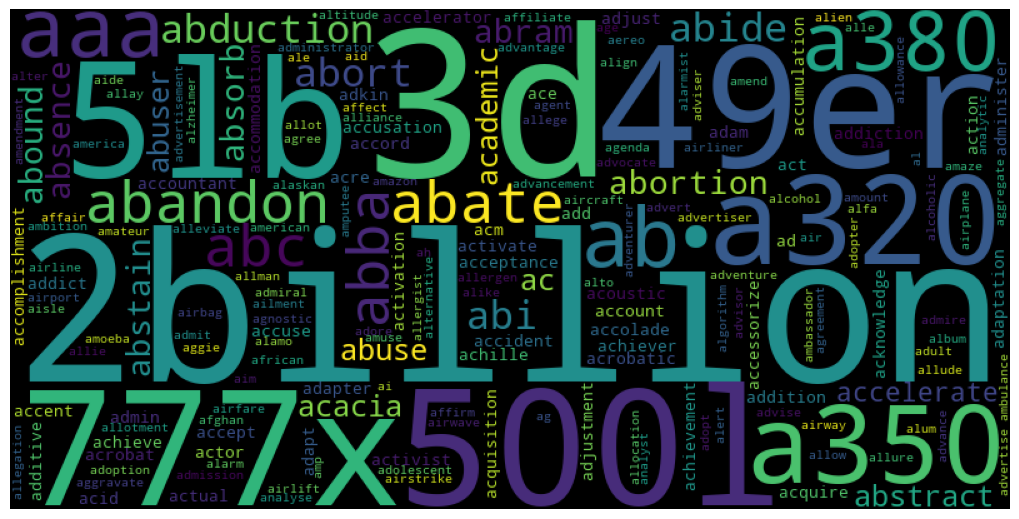

In [49]:
for_wordcloud = vectorizer.get_feature_names_out()
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color='black',
                      min_font_size=7).generate(for_wordcloud_str)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 7.3</p>

<p>Determinación de la importancia de las palabras.</p>

### Construcción de Modelo

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Después de dividir el conjunto de datos en entrenamiento y prueba, aplicamos el algoritmo *Multinomial Naive Bayes* usando el siguiente código:

In [51]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

Verificamos la precisión del modelo llamando a su método `score`: 

In [52]:
mnb.score(x_test, y_test)

0.9257847639789782

La salida indica que el modelo alcanza un 92.7% de precisión en los datos de prueba.  
A continuación, probaremos el modelo *Bernoulli*. La salida en este caso es:  

In [53]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
bnb.score(x_test, y_test)


0.925690071492827

Como se puede observar, ambos modelos han dado una precisión casi igual.

### Inferencia en Datos No Vistos

Ahora crearemos cuatro títulos de noticias y estudiaremos la inferencia realizada por nuestro modelo entrenado sobre estos mensajes. Usamos el siguiente código. La salida es:

In [54]:
text_message=[
    "New 'Game of Thrones' Season 4 Trailer: ",
    "I Will Answer Injustice with Justice!",
    "Bitcoin exchange files for bankruptcy",
    "ECB's Noyer: Low inflation may hamper adjustment"]

msg = vectorizer.transform(text_message)
print("prediction from model: {}".format(mnb.predict(msg)))

prediction from model: [1 1 0 0]


Como podemos ver en la predicción, hemos obtenido la salida en un arreglo como [1,0,0] de categorías, las cuales hemos codificado con etiquetas (*label encoded*) para el mapeo de clases en orden alfabético. Esto simplemente significa que el primer texto se predice como 1, es decir, tipo *e* (Entretenimiento), el segundo texto se predice como 0, es decir, tipo *b* (Negocios), y el tercer texto también se predice como 0, es decir, tipo *b* (Negocios).

## Resumen

En este capítulo, aprendiste sobre el algoritmo *naive Bayes* y sus aplicaciones en situaciones de la vida real. Un modelo de aprendizaje automático basado en este algoritmo ayuda a hacer predicciones rápidas sobre conjuntos de datos de alta dimensión. Probablemente es el algoritmo más simple y, al mismo tiempo, más eficiente para clasificación. Se entrena rápidamente y, por lo tanto, es muy útil en el análisis de datos en tiempo real. Lo basamos en el teorema *naive Bayes* y hacemos una suposición “ingenua” de que todas las características del conjunto de datos son independientes entre sí. La librería *sklearn* proporciona varias implementaciones según la distribución de los datos. 